# Current Factor Decoupling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


from matplotlib import style
import matplotlib as mpl
import matplotlib.font_manager as fm

style.use('ggplot')
font = fm.FontProperties(fname='Font/helvetica.ttf')
mpl.rcParams['font.family'] = font.get_name()


import warnings
warnings.filterwarnings('ignore')
my_colors = {'DBlue':'#424f64', 'LBlue':'#a4afc0', 'BrBlue':'#85c7f2', 'DGrey':'#4c4c4c', 'MGrey':'#636363', 
             'DRed':'#961e19', 'LGrey':'#d1d1d1'}

Last time we were talking about alpha, beta, and smart beta as the core principles of investment analysis.

We saw that we could create market neutral factor portfolios based on certain desirable properties of stocks, e.g., Value vs. Growth, Size, etc.

In this post, I suggest taking a closer look at the recent behavior of the Value factor (measured as HML factor as per Fama and French (1992)), Profitability factor (RMW in Fama and French (2015)), and the Deutsche Bank Quality Index.
compared to the equity premium (Mkt-RF).

## HML and RMW performance

In the previous post, we concluded that, for example, the Value factor provides positive or negative returns depending on whether the market rewards Value or Growth of companies. Let us see how the HML factor performed in 2010 – 2018.

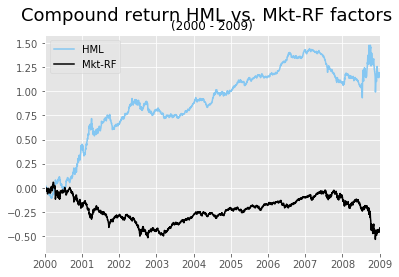

In [2]:
# Load factors
df = pd.read_csv('Data/F-F_Research_Data_5_Factors_2x3_daily.CSV', index_col=0 ,parse_dates=True) 

#Keep relevant years
df_old = df.loc['2000':'2009']
df_new = df.loc['2010':'2018']

# Create compound
ret_old = (1+ df_old/100).cumprod() - 1
ret_new = (1+ df_new/100).cumprod() - 1

#Plot

_ = plt.plot(ret_old['HML'], color=my_colors['BrBlue'], label = 'HML')
_ = plt.plot(ret_old['Mkt-RF'], color='black', label = 'Mkt-RF')
_ = plt.xlim('2000','2009')
_ = plt.suptitle('Compound return HML vs. Mkt-RF factors', fontsize=18)
_ = plt.title('(2000 - 2009)', fontsize= 12)
_ = plt.legend()

# Save 
_= plt.savefig('Graphs/HML_comp_00_09.png', dpi=300)

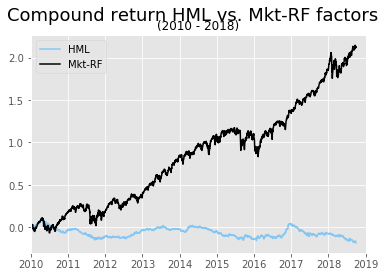

In [3]:
_ = plt.plot(ret_new['HML'], color=my_colors['BrBlue'], label = 'HML')
_ = plt.plot(ret_new['Mkt-RF'], color='black', label = 'Mkt-RF')
_ = plt.xlim('2010','2019')
_ = plt.suptitle('Compound return HML vs. Mkt-RF factors', fontsize=18)
_ = plt.title('(2010 - 2018)', fontsize= 12)
_ = plt.legend()

# Save 
_= plt.savefig('Graphs/HML_comp_10_18.png', dpi=300)

Almost flat compared to booming market factor.

What about the Profitability (RMW) factor?


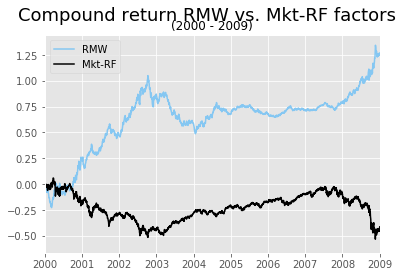

In [4]:
_ = plt.plot(ret_old['RMW'], color=my_colors['BrBlue'], label = 'RMW')
_ = plt.plot(ret_old['Mkt-RF'], color='black', label = 'Mkt-RF')
_ = plt.xlim('2000','2009')
_ = plt.suptitle('Compound return RMW vs. Mkt-RF factors', fontsize=18)
_ = plt.title('(2000 - 2009)', fontsize= 12)
_ = plt.legend()

# Save 
_= plt.savefig('Graphs/RMW_comp_00_09.png', dpi=300)

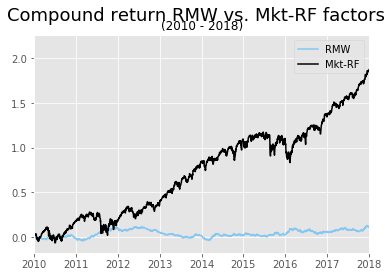

In [5]:
_ = plt.plot(ret_new['RMW'], color=my_colors['BrBlue'], label = 'RMW')
_ = plt.plot(ret_new['Mkt-RF'], color='black', label = 'Mkt-RF')
_ = plt.xlim('2010','2018')
_ = plt.suptitle('Compound return RMW vs. Mkt-RF factors', fontsize=18)
_ = plt.title('(2010 - 2018)', fontsize= 12)
_ = plt.legend()

# Save 
_= plt.savefig('Graphs/RMW_comp_10_18.png', dpi=300)

Pretty much the same picture.

## Quality Index

Finally, let's look at the Deutsche Bank Equity Sector-Neutral Quality Factor. You can read more about the index composition here (https://index.db.com/dbiqweb2/servlet/indexsummary?redirect=benchmarkIndexSummary&indexid=99000242&currencyreturntype=EUR-Local&rebalperiod=2&pricegroup=STD&history=4&reportingfrequency=1&returncategory=ER&indexStartDate=20150813&priceDate=20180813&isnew=true).

In brief, it is a market neutral index that is supposed to measure the quality of the companies by investing into companies whose return on invested capital (ROIC) is higher than the average for the sector and selling short stocks of the companies whose ROIC underperforms sector average.

Here we use USD denominated market neutral index.

First, let’s see how the index performed in 2000 – 2009.

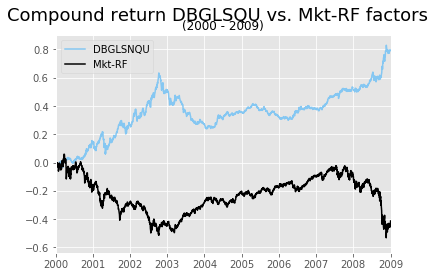

In [6]:
#Combine index and X-rate
dbq_usd = pd.read_csv('Data/DBGLSNQU.csv', index_col=0, parse_dates=True)
dbq_usd.columns = ['DBGLSNQU']

# Calculate return
dbq_usd = dbq_usd['DBGLSNQU'].pct_change()
dbq_usd = pd.DataFrame(dbq_usd)

#Add market
dbq_usd = dbq_usd.join(df['Mkt-RF']/100, how='right')
dbq_usd = dbq_usd.iloc[1:,]

# Divide into periods
dbq_old = dbq_usd.loc['2000':'2009']
dbq_new = dbq_usd.loc['2010':'2018']

# Create compound
dbq_ret_old = (1+ dbq_old).cumprod() - 1
dbq_ret_new = (1+ dbq_new).cumprod() - 1

#Plot

_ = plt.plot(dbq_ret_old['DBGLSNQU'], color=my_colors['BrBlue'], label = 'DBGLSNQU')
_ = plt.plot(dbq_ret_old['Mkt-RF'], color='black', label = 'Mkt-RF')
_ = plt.xlim('2000','2009')
_ = plt.suptitle('Compound return DBGLSQU vs. Mkt-RF factors', fontsize=18)
_ = plt.title('(2000 - 2009)', fontsize= 12)
_ = plt.legend()

# Save 
_= plt.savefig('Graphs/DBQ_comp_00_09.png', dpi=300)

Now, let us look at recent years.

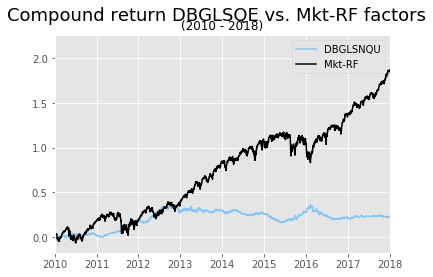

In [7]:
_ = plt.plot(dbq_ret_new['DBGLSNQU'], color=my_colors['BrBlue'], label = 'DBGLSNQU')
_ = plt.plot(dbq_ret_new['Mkt-RF'], color='black', label = 'Mkt-RF')
_ = plt.xlim('2010','2018')
_ = plt.suptitle('Compound return DBGLSQE vs. Mkt-RF factors', fontsize=18)
_ = plt.title('(2010 - 2018)', fontsize= 12)
_ = plt.legend()


# Save 
_= plt.savefig('Graphs/DBQ_comp_10_18.png', dpi=300)

## What it may mean

As we can see, the recent market boom was not accompanied by a corresponding growth of the factors. As the market value increased by more than 150% since the meltdown of 2008, the Value factor, the Profitability factor, and the quality index remained almost unchanged.

I see two plausible explanations:

-	“Times have changed,” i.e., in the current structure of the world economy, accounting measures like the book value of equity or the profitability of a company do not matter anymore. Such a view was expressed, for example, in the recent publication by the Harvard Review (https://hbr.org/2018/02/why-financial-statements-dont-work-for-digital-companies). Indeed, we can see some companies (think Tesla) that show consistent losses and are valued much higher than older companies in the same industry (think GM).


-	“Too much liquidity.” The Fed was fighting with the aftermath of the meltdown by pumping liquidity into the markets through the QE program. In the environment of low-interest rates and volatile commodity prices, this liquidity found its way into the stock market. To put things bluntly, investors were buying anything that looked alive without paying much attention to fundamental factors.

However, I am very skeptical when it comes to accepting the fact that “times have changed.” Although it is very tempting to believe that we live in a unique moment of history, I am afraid that this seems unlikely. Every generation seems to think that they live in unique times, but then History proves them wrong over and over again.

I tend to believe that what we are experiencing on the stock market is, essentially, a bubble created by the excessive liquidity. If this is the case, quite soon we may see the situation unfolding in two possible ways:

-	“Market rebalance” is a scenario where the stock market will stagnate at the current levels for quite a while, but under the hood the changes will still be drastic: the stocks of high-quality companies will grow, while the bad quality stocks will plummet. The revert to the fundamentals will show that “the emperor has no clothes” and the current market favorites will lose much of their value if not cease to exist.


-	“Market correction.” In this scenario, the entire market will be affected by the burst of the bubble. The Fed does not have much room for a further decrease of the interest rates, and extra liquidity could be provided only at the expense of inflation control. We could see a sharp decline in the stock market that would last longer than the meltdown of 2008.


## Conclusion

Generally, I am not fond of people forecasting the next market crash, because saying that the market will crash is the same as saying that there will be cold in winter. One day it will definitely happen, but the trick is to predict when and by how much.

Yet, that is exactly what I have done in this post. Unfortunately, markets can stay irrational long enough, and the longer it takes for the markets to correct, the sharper and the longer the correction is likely to be.

The exact timing depends on multiple factors: The Fed’s actions, decisions of other central banks, economic growth in the US and other key economies, political decisions of the current administration, and looks like even the Twitter activity of the President.

The takeaway we can have from this analysis is that there is a structural imbalance on the market, and although we cannot say for sure where is the inflection point, we should be vigilant when making decisions about portfolio allocation.


## References

*1. Fama, Eugene F., and Kenneth R. French. "The cross‐section of expected stock returns." the Journal of Finance 47.2 (1992): 427-465.*

*2. Fama, Eugene F., and Kenneth R. French. "Incremental variables and the investment opportunity set." Journal of Financial Economics 117.3 (2015): 470-488.*


### Reminder

**If you choose to use this publication for your own work, please include a reference to this publication and a link leading to this document. **

### Disclaimer

**Not an Offer or Inducement**

*This publication has been prepared for informational purposes only and does not constitute an offer to sell, a solicitation of an offer to buy, or a recommendation of any security or any other product or service by QFL Capital LLC., QFL Holdings Inc., authors of the publication, or any other third party regardless of whether such security, product or service is referenced in this publication. None of the information or analyses presented are intended to form the basis for any investment decision, and no specific recommendations are intended.*

*Accordingly, this publication does not constitute investment advice or counsel or solicitation for investment in any security. This publication does not constitute or form part of, and should not be construed as, any offer for sale or subscription of, or any invitation to offer to buy or subscribe for, any securities, nor should it or any part of it form the basis of, or be relied on in any connection with, any contract or commitment whatsoever.*

*QFL Capital LLC., QFL Holdings Inc., and authors of the publication expressly disclaim any and all responsibility for any direct or consequential loss or damage of any kind whatsoever arising directly or indirectly from: (i) the use of this site; (ii) reliance on any information contained herein; (iii) any error, omission or inaccuracy in any such information; or (iv) any action resulting therefrom.*


**Investment Performance**

*Investors should seek financial advice regarding the appropriateness of investing in any securities or investment strategies discussed or recommended in this documentation and should understand that statements regarding future prospects may not be realized. Investors should note that income from such securities may fluctuate and that each security's price or value may rise or fall. Accordingly, investors may receive back less than originally invested.*

*Past performance is not necessarily a guide to future performance. In consideration of being permitted access to the publication, the viewer hereby acknowledges having read and understood this agreement and agrees to be bound by its terms and conditions.*

**No Warranties**

*QFL Capital LLC., QFL Holdings Inc., and authors of the publication take care to ensure that the information provided is accurate and up to date. However, this document is provided without warranties of any kind, either expressed or implied, including but not limited to warranties of title or implied warranties of merchantability or fitness for a particular purpose. Opinions expressed herein are subject to change without notice. All information and content on this publication is furnished "as is," without warranty of any kind, express or implied, including but not limited to implied warranties of merchantability, fitness for a particular purpose, or non-infringement.*